# 
# Análise de Dados de Campanhas de Marketing de Instituições Financeiras

## 
# Introdução e Objetivo
Os dados são referentes a campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram  baseadas em ligações telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, a fim de saber se o depósito bancário a prazo seria ('sim') ou não ('não') adquirido pelo cliente.

O objetivo principal do projeto é tratar os valores ausentes, entretanto, também farei a limpeza e tratamento de eventuais outros problemas que forem identificados durante a análise.

Os dados utilizados neste projeto são de fonte pública, ou seja, você também pode trabalhar encima desse dados. O dataset esta disponível para download em: https://archive.ics.uci.edu/dataset/222/bank+marketing

## 
## Carregando os Pacotes

In [1]:
## Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Versões dos pacotes utilizados neste Jupyter Notebook
%reload_ext watermark
%watermark -a "Danilo Carlesso" --iversions

Author: Danilo Carlesso

matplotlib: 3.5.2
numpy     : 1.21.5
pandas    : 1.4.4
seaborn   : 0.11.2



## 
## Carregando os Dados

In [3]:
# Carrega os dados
df = pd.read_csv("dados/dataset.csv")

In [4]:
# Shape
df.shape

(45211, 19)

In [5]:
# Amostra dos dados
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# 
## Análise Exploratória dos Dados

In [6]:
# Informação do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [7]:
# Veriicando quais colunas tem valores ausentes
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [8]:
# Contando quantos valores ausentes há em cada coluna
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [9]:
# Removendo a coluna de identificação
df.drop(columns=["customerid"], inplace=True)

In [10]:
# Colunas do DF
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

> A coluna "jobedu" parece ter 2 informações em uma unica coluna, vamos verificar e tratar.

In [11]:
# Verificando a coluna
df["jobedu"]

0           management,tertiary
1          technician,secondary
2        entrepreneur,secondary
3           blue-collar,unknown
4               unknown,unknown
                  ...          
45206       technician,tertiary
45207           retired,primary
45208         retired,secondary
45209     blue-collar,secondary
45210    entrepreneur,secondary
Name: jobedu, Length: 45211, dtype: object

In [12]:
# Separa a coluna "jobedu" em 2 colunas com informações distintas
df[["job", "edu"]] = df["jobedu"].str.split(",", expand=True)

In [13]:
# Remove a coluna original com as informações combinadas
df.drop(columns="jobedu", inplace=True)

In [14]:
# Amostra dos dados
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## 
## Tratamento de Valores Ausentes

In [15]:
# Verificando as colunas com valores ausentes
df.isna().any()

age          True
salary       True
balance     False
marital     False
targeted    False
default     False
housing     False
loan        False
contact     False
day         False
month        True
duration    False
campaign    False
pdays       False
previous    False
poutcome    False
response     True
job         False
edu         False
dtype: bool

### 
### Tratando a Variável "Age"

In [16]:
# Verificando a quantidade de valores ausentes na coluna "Age"
df["age"].isna().sum()

20

In [17]:
# Verificando a porcentagem de valores ausentes na coluna "Age"
df["age"].isnull().mean()*100

0.0442370219636814

In [18]:
# Resumo estatístico
df.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

> A coluna "Age" possui menos de 0,05% de valores nulos, portanto, não faz sentido droparmos a coluna. Nessa situação podemos dropar as linhas e perder 20 registros de informações ou imputar os valores ausentes. Vamos verificar como os dados estão distribuídos.

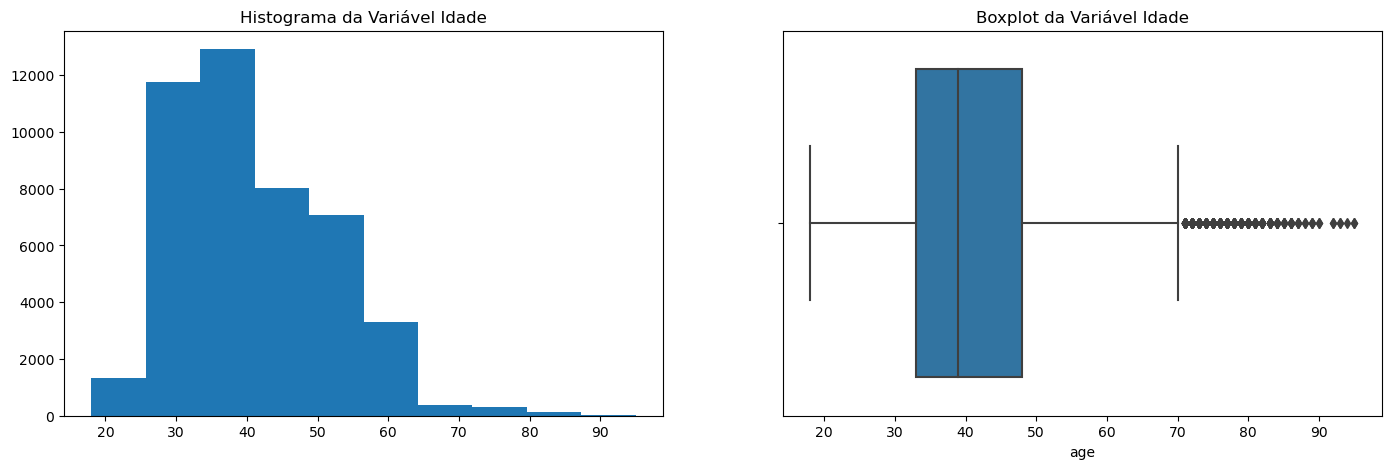

In [19]:
# Verificando como os dados estão distribuidos na variável

# Cria a figura
plt.figure(figsize=(17,5))

# Histograma
plt.subplot(1,2,1)
plt.hist(df["age"].dropna())
plt.title("Histograma da Variável Idade")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(df["age"])
plt.title("Boxplot da Variável Idade")

# Mostrar os gráficos
plt.show()

In [20]:
# Verificando as medidas centrais
print(f"Valor média é: {df['age'].mean()}")
print(f"Valor da mediana é: {df['age'].median()}")
print(f"Valor da moda é: {df['age'].mode().values[0]}")

Valor média é: 40.93565090394105
Valor da mediana é: 39.0
Valor da moda é: 32.0


> Observando os gráficos plotados podemos perceber que a coluna "age" possui diversos outliers. A média por sua vez é muito sensível aos outliers, portanto, não é uma boa opção neste caso. A mediana é menos sensível aos outliers porém esta muito próxima do valor da média, logo também não considero uma boa opção para a imputação. Neste caso, vou realizar a imputação dos valores ausentes na coluna "age" com o valor da **moda**, buscando impactar o mínimo possível o padrão dos dados.

In [21]:
# Cria uma cópia do df
df2 = df.copy()

In [22]:
# Substituindo os valores ausentes da coluna "Age" pela moda
df2["age"].fillna(df2["age"].mode().values[0], inplace=True)

In [23]:
# Verificando a porcentagem de valores ausentes
df2["age"].isnull().mean()*100

0.0

In [24]:
# Transformando de float64 para int64 pois idade é sempre número inteiro
df2["age"] = df2["age"].astype("int64")

### 
### Tratando a Variável "Month"

In [25]:
# Visão geral da variável
df2["month"]

0        may, 2017
1        may, 2017
2        may, 2017
3        may, 2017
4        may, 2017
           ...    
45206    nov, 2017
45207    nov, 2017
45208    nov, 2017
45209    nov, 2017
45210    nov, 2017
Name: month, Length: 45211, dtype: object

In [26]:
# Quantidade de valores ausentes
df2["month"].isna().sum()

50

In [27]:
# Porcentagem de valores ausentes
df2["month"].isna().mean()*100

0.11059255490920351

In [28]:
# Contagem das categorias
df2.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

> O percentual de valores ausentes é menor do que 30%, portanto não podemos dropar a coluna. Neste caso poderiamos optar por excluir as linhas com valores ausentes e perder 50 registros de informações ou fazer a imputação. Vamos verificar como os dados estão distribuídos.

In [29]:
# Contagem das categorias presentes na variável
df2["month"].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

> Levando em consideração que há poucos valores ausentes na variável, vou imputar os mesmos com a **moda**, impactando assim o minímo possível no padrão da variável e mantendo 50 registros de informações no conjunto de dados.

In [30]:
# Substitui os valores ausentes pela moda
df2["month"].fillna(df2["month"].values[0], inplace=True)

In [31]:
# Porcentagem de valores ausentes na variável
df2["month"].isna().mean()*100

0.0

### 
### Tratando a Variável "Salary"

In [32]:
# Verificando a quantidade de valores ausentes na variável
df2["salary"].isna().sum()

26

In [33]:
# Verificando a porcentagem de valores ausentes na variável
df2["salary"].isna().mean()*100

0.05750812855278583

> A variável possui menos de 30% de valores ausentes, ou seja, não é viável fazer o drop da coluna. Neste caso podemos fazer a imputação dos valores ou excluir as linhas com valores ausentes. Vamos analisar como os dados estão distribuídos.

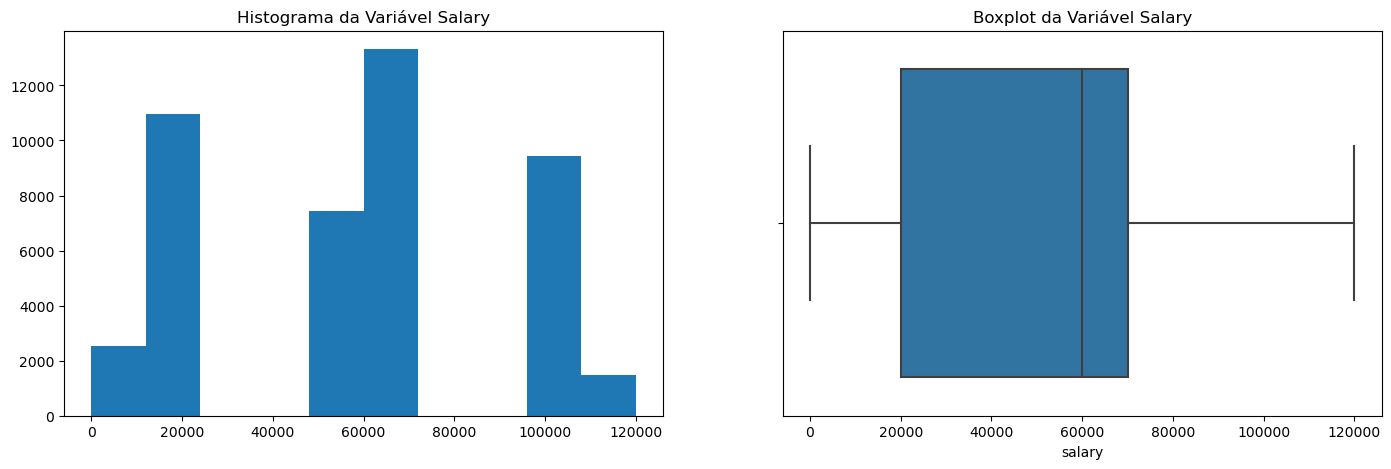

In [34]:
# Cria a área dos gráficos
plt.figure(figsize=(17,5))

# Histograma
plt.subplot(1,2,1)
plt.hist(df2["salary"])
plt.title("Histograma da Variável Salary")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(df2["salary"])
plt.title("Boxplot da Variável Salary")

# Mostrar os gráficos
plt.show()

In [35]:
# Contagem dos valores presentes na variável
df2["salary"].value_counts()

20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
Name: salary, dtype: int64

In [36]:
# Verificando as medidas de tendência centrais
print(f"Média: {df2['salary'].mean()}")
print(f"Mediana: {df2['salary'].median()}")
print(f"Moda: {df2['salary'].mode()[0]}")

Média: 57008.65331415293
Mediana: 60000.0
Moda: 20000.0


> Além dos valores ausentes identificados anteriormente, pelo histograma podemos verificar que há salários como "0". Neste caso o valor "0" apresenta falta de informação, ou seja, vamos imputa-lo também. Como a variável não possui outliers a média pode ser uma boa alternativa para ser usada na imputação dos valores ausentes e com falta de informação, vamos verificar se podemos utiliza-la identificando se a variável esta ou não enviesada.

In [37]:
# Calculando a assimetria da variável
df2["salary"].skew()

0.13767483033054806

> Com o calculo da assimetria da variável podemos concluir que os dados não estão enviesados, ou seja, podemos utilizar a média para imputação. Neste caso não tentei utilizar a mediana pois a maior parte dos salários esta abaixo dela e moda por estar muito abaixo da média e mediana.

In [38]:
# Substitui os valores ausentes pelo valor da média
df2["salary"].fillna(round(df2['salary'].mean()), inplace=True)

In [39]:
# Substitui os valores com falta de informação ("0") pela média
df2.salary[df2["salary"] == 0] = round(df2['salary'].mean())

In [40]:
# Porcentagem de valores ausentes na variável
df2["salary"].isna().mean()*100

0.0

### 
### Tratando a variável "Response"

In [41]:
# Verificando a quantidade de valores ausentes na variável
df2.response.isna().sum()

30

In [42]:
# Verificando a porcentagem de valores ausentes na variável
df2.response.isna().mean()*100

0.0663555329455221

In [43]:
# Contagem das categorias
df2.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

> O percentual de valores ausentes é menor do que 30%, portanto não podemos dropar a coluna até porque variável "response" é a alvo da nossa análise. Por ser a variável alvo, não é uma boa pratica fazer a imputação dos valores ausentes, o melhor a se fazer é dropar as linhas com falta de informação.

In [44]:
# Removendo as linhas com valores ausentes na variável alvo
df2.dropna(subset=["response"], inplace=True)

In [45]:
# Verificando a porcentagem de valores ausentes na variável
df2.response.isna().mean()*100

0.0

### 
### Verificando os Dados após Tratamentos

In [46]:
# Amostra dos dados
df2.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,57009.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


> A variável "pdays" indica a quantidade de dias desde o último contato, entretanto, pela amostra dos dados constam valores como "-1" que indicam que nunca foi realizado contato com o cliente, portanto, eu julgo esses valores falta de informação para ajudar entender o que leva um cliente adquirir ou não o produto (Depósito bancário). Vamos análisar a variável e excluir esses valores.

### 
### Tratando a variável "Pdays"

In [47]:
# Resumo estatístico
df2.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [48]:
# Transformando os valores "-1" em "NaN"
df2.pdays.replace(to_replace= -1, value=np.nan, inplace=True)

In [49]:
# Verificando a porcentagem de ausência de informações na variável
df2.pdays.isna().mean()*100

81.73789867422147

> Ao contrário de todas outras variáveis tratadas até o momento, esta na ocasião possui mais de 30% de valores ausentes/falta de informação, portanto, não vale a pena tentar tratar essa variável, vamos apenas excluí-la.

In [50]:
# Dropando a coluna
df2.drop(columns="pdays", inplace=True)

## 
## Análise dos Dados

### 
### Análise Univariada

In [51]:
# Proporção da variável "marital"
df2.marital.value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

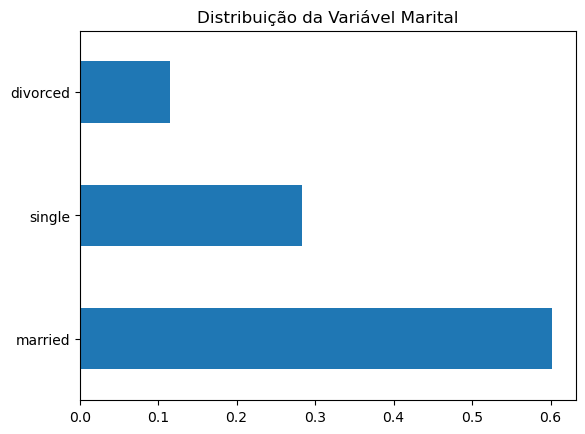

In [52]:
# Plot
df2.marital.value_counts(normalize=True).plot(kind="barh")
plt.title("Distribuição da Variável Marital")

plt.show()

In [53]:
# Proporção da variável "job"
df2.job.value_counts(normalize=True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

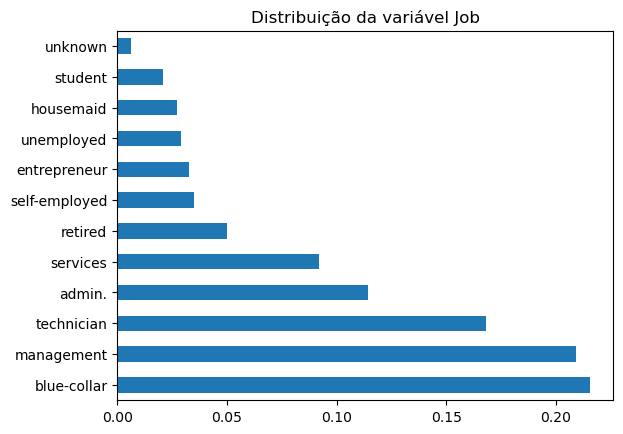

In [54]:
# Plot
df2.job.value_counts(normalize=True).plot(kind= "barh")
plt.title("Distribuição da variável Job")

plt.show()

In [55]:
# Proporção da variavel "edu"
df2.edu.value_counts(normalize=True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: edu, dtype: float64

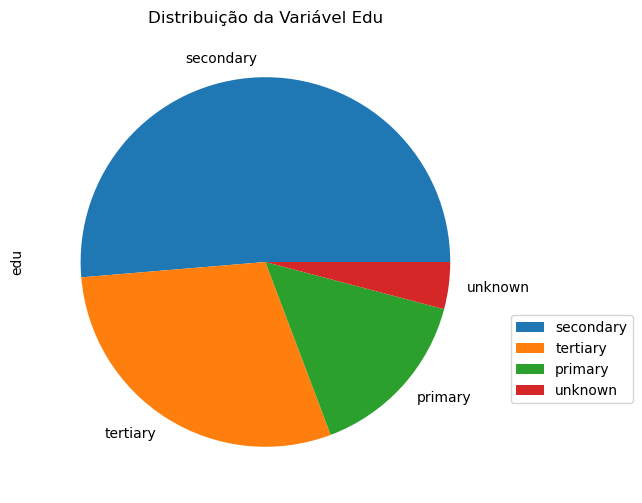

In [56]:
# Plot
plt.figure(figsize=(8,6))
df2.edu.value_counts(normalize=True).plot(kind= "pie")
plt.title("Distribuição da Variável Edu")
plt.legend(bbox_to_anchor=(1.31,0.4))

plt.show()

In [57]:
# Proporção da variável "response"
df2.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

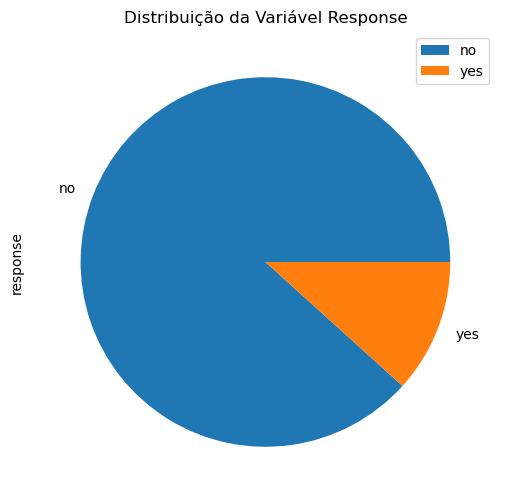

In [58]:
# Plot
plt.figure(figsize=(8,6))
df2.response.value_counts(normalize=True).plot(kind="pie")
plt.title("Distribuição da Variável Response")
plt.legend()

plt.show()

### 
### Análise Multivariada

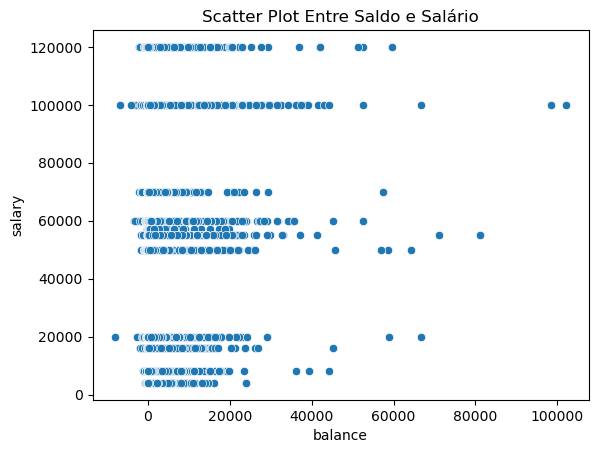

In [59]:
# Scatter Plot entre saldo e salário
sns.scatterplot(df2.balance, df2.salary)
plt.title("Scatter Plot Entre Saldo e Salário")

plt.show()

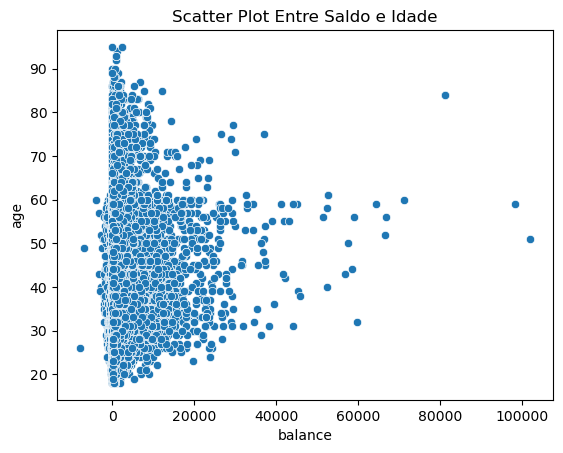

In [60]:
# Scatter Plot entre saldo e idade
sns.scatterplot(df2.balance, df2.age)
plt.title("Scatter Plot Entre Saldo e Idade")

plt.show()

In [61]:
# Calcula a correlação
corr = df2[["salary", "balance", "age"]].corr()

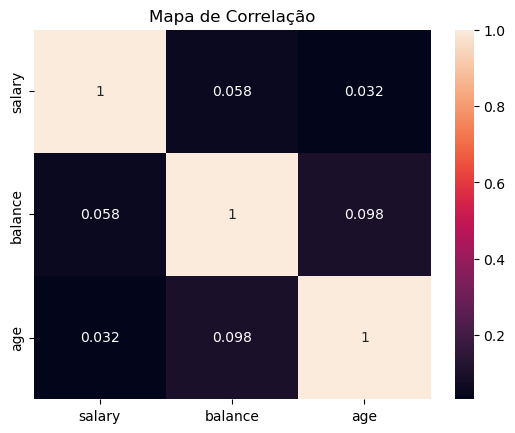

In [62]:
# Mapa de correlação
sns.heatmap(corr, annot=True)
plt.title("Mapa de Correlação")

plt.show()

### 
### Numérico x Categórico

In [63]:
# Agrupa por "response" o "salary" e calcula a média
df2.groupby("response")["salary"].mean()

response
no     57136.700256
yes    59138.321543
Name: salary, dtype: float64

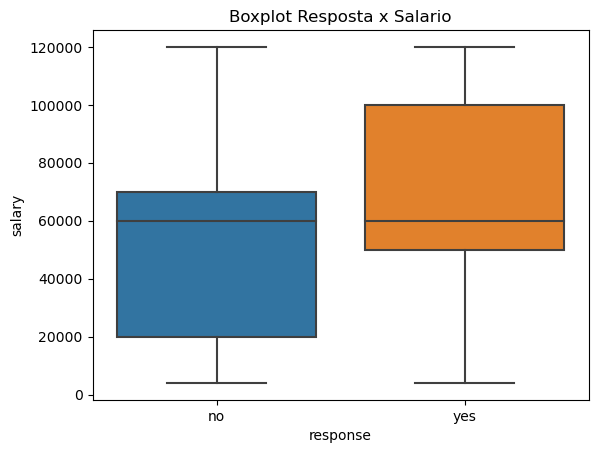

In [64]:
# Boxplot
sns.boxplot(df2.response, df2.salary)
plt.title("Boxplot Resposta x Salario")

plt.show()

In [65]:
# Agrupa por "edu" e calcula o "salary" médio
df2.groupby("edu")["salary"].mean()

edu
primary      34672.633548
secondary    49911.972444
tertiary     83030.501279
unknown      50499.014009
Name: salary, dtype: float64

In [66]:
# Cria a variável response_flag como tipo numérica aonde response "yes"=1 e "no"=0.
df2["response_flag"] = np.where(df2["response"] == "yes", 1, 0)
df2.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,edu,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,57009.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


In [67]:
# Criando uma tabela pivot para verificar a correlação das colunas com a variável alvo
df_corr = df2.pivot_table(index="edu", columns=["marital"], values="response_flag")

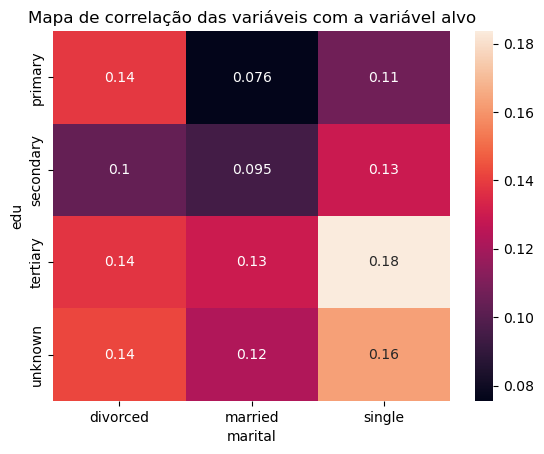

In [68]:
# Mapa de correlação
sns.heatmap(df_corr, annot=True)
plt.title("Mapa de correlação das variáveis com a variável alvo")

plt.show()

In [69]:
# Criando uma tabela pivot para verificar a correlação das colunas com a variável alvo
df_corr2 = df2.pivot_table(index="housing", columns=["loan"], values="response_flag")

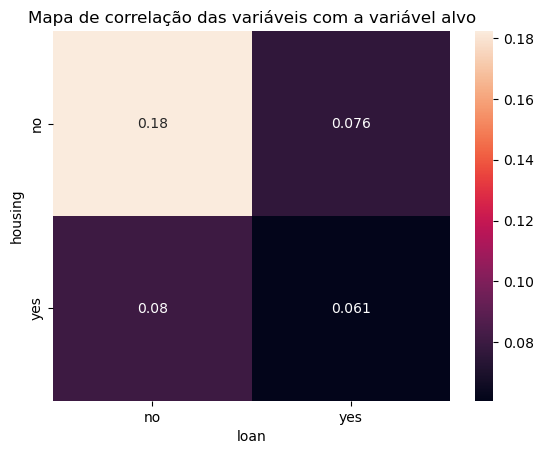

In [70]:
# Mapa de correlação
sns.heatmap(df_corr2, annot=True)
plt.title("Mapa de correlação das variáveis com a variável alvo")

plt.show()

## 
## Relatório Final

Com base na análise observamos que as variáveis mais relevantes para identificar um potêncial cliente são:
- Estado Cívil.
- Nível de Escolaridade.
- Salário.
- Se tem ou não empréstimo habitacional.
- Se tem ou não empréstimo pessoal.


**Recomendações Finais:**
- A equipe de marketing poderia desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.
- A equipe de marketing deveria focar em pessoas que o estado cívil seja solteiro, com nível de escolaridade superior, salário anual acima de 60.000 e que não possua empréstimo habitacional e pessoal.

## 
## Fim